## 实验记录

In [1]:
%run Experiment-exploration-ALL.init.ipynb


Import modules successfully

Create:
idpart:{} 
 record_data:{'tool.word': {}, 'useStopwords': {}, 'classifier': {}, 'micro-F1': {}, 'time.format.train': {}, 'time.format.evaluate': {}, 'time.format.all': {}, 'time.raw.train': {}, 'time.raw.evaluate': {}, 'time.raw.all': {}}
 record_labels:['tool.word', 'useStopwords', 'classifier', 'micro-F1', 'time.format.train', 'time.format.evaluate', 'time.format.all', 'time.raw.train', 'time.raw.evaluate', 'time.raw.all']

Data structure for recording experiment data created.

Pick random folders from source successfully


### Word2Vec 表示(gensim + corpus)-无停用词

In [7]:
idpart['useStopwords'] = 'NO'
idpart['tool.word'] = 'gensim'
phase = 'init'

%run Experiment-exploration-Word2Vec.gensim.ipynb

##### A. 建立词模型

In [8]:
timev = {i:0.0 for i in ['h', 'min', 'sec', 'ms', 'us']}

In [9]:
vecsize = 750

In [10]:
%%capture --no-display timevStr
%%time

phase = 'modeling.word'
%run Experiment-exploration-Word2Vec.gensim.ipynb

In [11]:
timeDict = getCellTime_Wall(timevStr)
for i in timeDict:
    timev[i] += timeDict[i]

{'h': 0, 'min': 8.0, 'sec': 12.0, 'ms': 0, 'us': 0}
Record time successfully.


In [12]:
# Save time of word-embedding training

wordtime = copy.copy(timev)

##### B. 建立文档模型

###### 文档的词向量均值表示(Arithmetic Mean)

In [13]:
timev = copy.copy(wordtime)

In [14]:
%%capture --no-display timevStr
%%time

phase = 'modeling.document'
%run Experiment-exploration-Word2Vec.gensim.ipynb

class         0         1         2         3  \
0                       sci.med -0.070521  0.069908  0.007662  0.018275   
1              rec.sport.hockey -0.064313  0.105446 -0.007620  0.034338   
2        soc.religion.christian -0.003794  0.077586  0.006609  0.047029   
3                  misc.forsale -0.083565  0.034831  0.029910  0.038671   
4            talk.religion.misc -0.078913  0.051629 -0.004842 -0.002794   
5            talk.politics.guns -0.073897  0.104667  0.010499 -0.005604   
6       comp.os.ms-windows.misc -0.046047  0.149624  0.009223  0.021808   
7                comp.windows.x  0.032838  0.006091  0.061285 -0.037721   
8        soc.religion.christian -0.088501  0.098138  0.040501 -0.044114   
9         comp.sys.mac.hardware -0.079187  0.115840  0.013416  0.013926   
10                      sci.med -0.074317  0.097146  0.008618 -0.011410   
11               comp.windows.x -0.296776  0.156598 -0.064578  0.062464   
12           talk.politics.misc -0.040840  0.087580 -0.018369 -0.006634   
13     comp.sys.ibm.pc.hardware -0.166878  0.183491 -0.015616 -0.036694   
14                    sci.space -0.041612  0.073553  0.021687  0.031364   
15           talk.politics.guns -0.052828  0.121598  0.012314 -0.017186   
16             rec.sport.hockey -0.067845  0.211549 -0.104221  0.186449   
17      comp.os.ms-windows.misc -0.061304  0.071092  0.021169 -0.012688   
18           talk.religion.misc -0.048910  0.133052  0.000656  0.030474   
19        comp.sys.mac.hardware -0.085925  0.134375 -0.048652  0.033969   
20           talk.politics.guns -0.028751  0.049385  0.041480  0.036216   
21           talk.politics.guns -0.059421  0.092882  0.038417 -0.043523   
22                comp.graphics -0.061216  0.043601  0.060766 -0.035234   
23           talk.politics.guns -0.077097  0.101994  0.004823  0.013745   
24     comp.sys.ibm.pc.hardware -0.083642  0.124004  0.035339 -0.029664   
25              sci.electronics -0.071380  0.098895  0.011032 -0.025144   
26        talk.politics.mideast -0.089885  0.204249 -0.002068 -0.005408   
27                      sci.med -0.090166  0.065779  0.016038 -0.019132   
28     comp.sys.ibm.pc.hardware -0.085467  0.093419  0.031867 -0.037718   
29             rec.sport.hockey -0.232553  0.186849 -0.170377 -0.103425   
...                         ...       ...       ...       ...       ...   
11284    soc.religion.christian -0.039906  0.072451  0.044049  0.019266   
11285        talk.religion.misc -0.116126  0.135460  0.017856 -0.010018   
11286             comp.graphics -0.062817  0.074202 -0.011187  0.013984   
11287                 rec.autos -0.043618  0.083966 -0.002486 -0.044390   
11288                 sci.space -0.080544  0.055212  0.015040 -0.039166   
11289  comp.sys.ibm.pc.hardware -0.102065  0.132202 -0.035523 -0.016366   
11290    soc.religion.christian -0.025183  0.023315  0.071244 -0.008577   
11291             comp.graphics -0.071693  0.117261  0.102260 -0.069324   
11292              misc.forsale -0.098100  0.129129 -0.068689 -0.004395   
11293        rec.sport.baseball -0.030399  0.059262 -0.013784  0.001678   
11294           rec.motorcycles -0.042335  0.021506  0.068581 -0.025066   
11295           rec.motorcycles -0.042895  0.088692 -0.029303  0.040822   
11296               alt.atheism -0.053600  0.111598  0.022540 -0.001759   
11297            comp.windows.x -0.000453  0.088645  0.052656 -0.007593   
11298        talk.politics.misc -0.048137  0.100594 -0.034557 -0.032087   
11299            comp.windows.x -0.019706  0.081220  0.036412  0.024570   
11300            comp.windows.x -0.050543  0.126868  0.040459 -0.026502   
11301               alt.atheism -0.046197  0.117480  0.072130 -0.020280   
11302     comp.sys.mac.hardware -0.091590  0.128185  0.007198  0.004592   
11303                 rec.autos -0.110540  0.092105  0.024491 -0.072878   
11304        talk.politics.guns -0.106125  0.074068 -0.089934  0.069430   
11305        talk.religion.misc -0.043397  0.113612

class         0         1         2         3  \
0              sci.electronics -0.056492  0.068716  0.061774 -0.011027   
1           rec.sport.baseball  0.047718  0.104002  0.058770  0.020835   
2             rec.sport.hockey -0.038918  0.093852  0.018484 -0.024799   
3                comp.graphics -0.086194  0.091044  0.018925 -0.032105   
4        comp.sys.mac.hardware -0.073209  0.061341  0.023004 -0.028848   
5             rec.sport.hockey -0.060376  0.060919 -0.026103  0.004147   
6      comp.os.ms-windows.misc -0.039333  0.047027  0.042448  0.006257   
7      comp.os.ms-windows.misc -0.045861  0.055027  0.056307 -0.039805   
8     comp.sys.ibm.pc.hardware -0.110748  0.210627 -0.053695  0.002024   
9           talk.politics.guns -0.055079  0.095392  0.003322  0.026308   
10          talk.politics.guns  0.017284  0.065640  0.015566 -0.070450   
11            rec.sport.hockey -0.046425  0.093225 -0.008082 -0.012881   
12             rec.motorcycles -0.081666  0.066002  0.009292 -0.039951   
13              comp.windows.x -0.078434  0.063521  0.036921  0.028924   
14                   rec.autos -0.066977  0.139183  0.018355 -0.022998   
15             rec.motorcycles -0.087775  0.073318  0.007272 -0.057444   
16             rec.motorcycles -0.059290  0.110235  0.006180 -0.002597   
17          talk.politics.guns -0.066345  0.086739 -0.003157 -0.009071   
18                misc.forsale -0.083122  0.153561  0.004510 -0.071321   
19          rec.sport.baseball -0.054953  0.142779 -0.005776 -0.020060   
20          talk.politics.guns -0.061250  0.121728  0.039019  0.019822   
21          talk.politics.guns  0.001195  0.189749 -0.022790 -0.047687   
22             sci.electronics -0.062600  0.144683 -0.044991  0.019653   
23              comp.windows.x -0.080245  0.096934  0.032054  0.001748   
24             sci.electronics -0.061567  0.050701  0.044965 -0.039024   
25            rec.sport.hockey -0.033628  0.110648 -0.085574  0.046340   
26              comp.windows.x -0.035226  0.090480 -0.007744  0.007532   
27       talk.politics.mideast -0.083876  0.121253  0.011884 -0.000010   
28          talk.politics.guns -0.023848  0.137064 -0.093473  0.014695   
29                misc.forsale -0.133967  0.134662 -0.065256 -0.038235   
...                        ...       ...       ...       ...       ...   
7502             comp.graphics -0.107346  0.094799  0.013556  0.022087   
7503        rec.sport.baseball -0.033795  0.111662 -0.011932  0.021955   
7504              misc.forsale -0.122089  0.091810  0.044949 -0.067368   
7505                   sci.med -0.086992  0.103675  0.019378  0.000215   
7506               alt.atheism -0.032285  0.054514  0.040098 -0.012430   
7507                 sci.crypt -0.024612  0.030791  0.030411 -0.051382   
7508          rec.sport.hockey -0.028420  0.038545 -0.002620 -0.020849   
7509           sci.electronics -0.022677  0.022530  0.016474 -0.032218   
7510           rec.motorcycles -0.084984  0.106784 -0.031601  0.013322   
7511            comp.windows.x -0.039910  0.087826  0.046257  0.004270   
7512               alt.atheism -0.036232  0.093154  0.021825 -0.020146   
7513                 sci.crypt  0.018977  0.015971  0.078426 -0.053220   
7514                 rec.autos -0.148008  0.118282 -0.035849 -0.064062   
7515          rec.sport.hockey  0.003155  0.073762 -0.041417  0.023224   
7516                 sci.space -0.120464  0.125523 -0.006367 -0.047495   
7517          rec.sport.hockey  0.001328  0.062881  0.013253  0.037725   
7518        talk.politics.guns  0.023145  0.152305  0.021012 -0.102533   
7519   comp.os.ms-windows.misc -0.007954  0.096315 -0.008034 -0.013329   
7520                 sci.crypt -0.097283  0.133256  0.043092 -0.018189   
7521    soc.religion.christian -0.073417  0.099065  0.007126  0.013231   
7522        talk.politics.misc -0.063788  0.015466  0.012198 -0.030580   
7523   comp.os.ms-windows.misc -0.075573  0.077391  0.059806 -0.014003   
7524     comp.sys.mac.hardwar

In [15]:
timeDict = getCellTime_Wall(timevStr)
for i in timeDict:
    timev[i] += timeDict[i]

{'h': 0, 'min': 0, 'sec': 24.6, 'ms': 0, 'us': 0}
Record time successfully.


##### C. 训练与评估

##### C.1 SVM classifier(gensim+corpus)

###### C.1.0 Save record_data

In [16]:
idpart['classifier'] = 'SVM'

phase = 'save_before_train'
%run Experiment-exploration-share.ipynb

###### C.1.1 Train

In [17]:
from sklearn.preprocessing import normalize

X_train_normal = normalize(X_train)
X_test_normal = normalize(X_test)

In [18]:
%%capture --no-display timevStr
%%time

from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=19, dual=False, C=10)
clf.fit(X_train_normal, y_train)

In [19]:
timeDict = getCellTime_Wall(timevStr)
for i in timeDict:
    record_data['time.raw.train'][ID][i] = timeDict[i]

{'h': 0, 'min': 0, 'sec': 16.7, 'ms': 0, 'us': 0}
Record time successfully.


###### C.1.2 Evaluate

In [20]:
%%capture --no-display timevStr
%%time

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_test_pred = clf.predict(X_test_normal)
record_data['micro-F1'][ID] = f1_score(y_test_true, y_test_pred, average='micro')

In [21]:
timeDict = getCellTime_Wall(timevStr)
for i in timeDict:
    record_data['time.raw.evaluate'][ID][i] = timeDict[i]

{'h': 0, 'min': 0, 'sec': 0, 'ms': 110.0, 'us': 0}
Record time successfully.


In [22]:
phase = 'post-display'
%run Experiment-exploration-share.ipynb

tool.word useStopwords classifier  micro-F1 time.format.train  \
0    gensim           NO        SVM  0.774429    0:00:16.700000   

  time.format.evaluate time.format.all  
0       0:00:00.110000  0:00:16.810000

##### C.2 RandomForest classifier(gensim+corpus)

###### C.2.0 Save record_data

In [23]:
idpart['classifier'] = 'RandomForest-0'

phase = 'save_before_train'
%run Experiment-exploration-share.ipynb

###### C.2.1 Train

In [24]:
from sklearn.preprocessing import normalize

X_train_normal = normalize(X_train)
X_test_normal = normalize(X_test)

In [25]:
%%capture --no-display timevStr
%%time

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=19, n_jobs=-1)
clf.fit(X_train_normal, y_train)

In [26]:
timeDict = getCellTime_Wall(timevStr)
for i in timeDict:
    record_data['time.raw.train'][ID][i] = timeDict[i]

{'h': 0, 'min': 0, 'sec': 0, 'ms': 912.0, 'us': 0}
Record time successfully.


###### C.2.2 Evaluate

In [27]:
%%capture --no-display timevStr
%%time

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_test_pred = clf.predict(X_test_normal)
record_data['micro-F1'][ID] = f1_score(y_test_true, y_test_pred, average='micro')

In [28]:
timeDict = getCellTime_Wall(timevStr)
for i in timeDict:
    record_data['time.raw.evaluate'][ID][i] = timeDict[i]

{'h': 0, 'min': 0, 'sec': 0, 'ms': 148.0, 'us': 0}
Record time successfully.


In [29]:
phase = 'post-display'
%run Experiment-exploration-share.ipynb

tool.word useStopwords      classifier  micro-F1 time.format.train  \
0    gensim           NO  RandomForest-0  0.440122    0:00:00.912000   
1    gensim           NO             SVM  0.774429    0:00:16.700000   

  time.format.evaluate time.format.all  
0       0:00:00.148000  0:00:01.060000  
1       0:00:00.110000  0:00:16.810000

##### C.3 NN classifier(gensim+corpus)

###### C.3.0 Save record_data

In [30]:
idpart['classifier'] = 'sk-NN-0'

phase = 'save_before_train'
%run Experiment-exploration-share.ipynb

###### C.3.1 Train

In [31]:
from sklearn.preprocessing import normalize

X_train_normal = normalize(X_train)
X_test_normal = normalize(X_test)

In [32]:
%%capture --no-display timevStr
%%time

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=19, hidden_layer_sizes=750, max_iter=300, alpha=0.01) #MLPClassifier()
clf.fit(X_train_normal, y_train)

In [33]:
timeDict = getCellTime_Wall(timevStr)
for i in timeDict:
    record_data['time.raw.train'][ID][i] = timeDict[i]

{'h': 0, 'min': 1.0, 'sec': 32.0, 'ms': 0, 'us': 0}
Record time successfully.


###### C.3.2 Evaluate

In [34]:
%%capture --no-display timevStr
%%time

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_test_pred = clf.predict(X_test_normal)
record_data['micro-F1'][ID] = f1_score(y_test_true, y_test_pred, average='micro')

In [35]:
timeDict = getCellTime_Wall(timevStr)
for i in timeDict:
    record_data['time.raw.evaluate'][ID][i] = timeDict[i]

{'h': 0, 'min': 0, 'sec': 0, 'ms': 191.0, 'us': 0}
Record time successfully.


In [36]:
phase = 'post-display'
%run Experiment-exploration-share.ipynb

tool.word useStopwords      classifier  micro-F1 time.format.train  \
0    gensim           NO  RandomForest-0  0.440122    0:00:00.912000   
1    gensim           NO             SVM  0.774429    0:00:16.700000   
2    gensim           NO         sk-NN-0  0.759161           0:01:32   

  time.format.evaluate time.format.all  
0       0:00:00.148000  0:00:01.060000  
1       0:00:00.110000  0:00:16.810000  
2       0:00:00.191000  0:01:32.191000

##### D. GridSearchCV to optimize parameters

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

def search_params(basis, params, scorer=make_scorer(f1_score, average='micro'), csvpath='GridSearchCV.csv'):
    """
    A helper function search parameters using sklearn.model_selection.GridSearchCV, 
    to find the best estimator,
    then display it and save data into a CSV file.
    ----------------
    Arguments: 
    
        basis      given to `estimator` of GridSearchCV
        params     given to `param_grid` of GridSearchCV
        scorer     given to `scoring` of GridSearchCV
        csvpath    where the data will be saved
        
    ----------------
    Returns:
    
        NoneType
    """
    # search
    clf = GridSearchCV(estimator=basis, param_grid=params, scoring=scorer, n_jobs=-1)
    clf.fit(X_train_normal, y_train)

    # print results
    print(clf.best_estimator_, clf.best_score_, clf.best_params_, sep='\n')

    # package data in pandas.DataFrame
    df = pd.DataFrame(clf.cv_results_)
    display(df)
    
    # output into csv
    df.to_csv(os.path.join(csvpath))

In [213]:
def plot_search_params(params, dfpath, param_fixed='', xlabels_custom=[]):
    # import modules
    import matplotlib.pyplot as plt
    import matplotlib.axes
    import matplotlib.axis as axis
    
    # read data from csv
    df = pd.read_csv(dfpath)
    
    if len(params) == 1:
        
        n_row, n_col = (1, 1) 
        fig, axes = plt.subplots(n_row, n_col, sharey=True, figsize=(10 * n_col, 2 * n_row))
        lines = {}
        
        i = 0
        
        # get data
        tmpdfcp = copy.copy(df)
        x_unit = list(params.keys())[0]
        ## use condition statement to restrict the length of label
        xlabels = ['{}_{}'.format(x_unit if len(x_unit) <=7 else x_unit[:7], 
                                  i) 
                   for i in tmpdfcp['param_{}'.format(x_unit)]] 
        x = np.arange(len(xlabels))
        inds = {ind:ix_label for (ind, ix_label) in zip(tmpdfcp.index, x)}
        tmpdfcp.rename(index=inds, inplace=True)
        y = 101-tmpdfcp['rank_test_score']
        
        # plot
        axes.set_xticks(x)
        axes.set_xticklabels(xlabels, rotation='vertical')
        lines[i],  = axes.plot(x, y)
    else:
        assert param_fixed != '', "Fix a parameter first."
        assert xlabels_custom != [], "Give parameter(s) that being X of the plot"
        
        n_row, n_col = (len(params[param_fixed]), 1)
        fig, axes = plt.subplots(n_row, n_col, sharey=True, figsize=(10 * n_col, 2 * n_row))
        lines = {}
        
        for (i, val) in enumerate(df['param_{}'.format(param_fixed)].unique()):
            # get data
            if val == val:
                tmpdfcp = copy.copy(df[df['param_{}'.format(param_fixed)] == val])
            else:
                # https://www.oreilly.com/learning/handling-missing-data
                # "there is no equivalent NaN value for integers, strings, or other types."
                tmpdfcp = copy.copy(df[df['param_{}'.format(param_fixed)].isnull()])
            
            # get xlabels
            if len(xlabels_custom) == 1:
                x_unit = xlabels_custom[0]
                xlabels = ['{}_{}'.format(x_unit if len(x_unit) <=7 else x_unit[:7],
                                          i) 
                           for i in tmpdfcp['param_{}'.format(x_unit)]]
            else:
                xlabels = []
                for ind, row in tmpdfcp.iterrows():
                    newlabel = '{}'.format(row['param_{}'.format(xlabels_custom[0])])
                    if len(newlabel) > 6:
                        newlabel = newlabel[:7]
                    for otherlabel in xlabels_custom[1:]:
                        newlabel += '_{}'.format(row['param_{}'.format(otherlabel)])
                    xlabels.append(newlabel)              

            x = np.arange(len(xlabels))
            inds = {ind:ix_label for (ind, ix_label) in zip(tmpdfcp.index, x)}
            tmpdfcp.rename(index=inds, inplace=True)
            y = 101-tmpdfcp['rank_test_score']
            
            # plot
            axes[i].set_xticks(x)
            axes[i].set_xticklabels(xlabels, rotation='vertical')
            lines[i],  = axes[i].plot(x, y, label='{}={}'.format(param_fixed, val))
            
            # set legend
            axes[i].legend(loc='upper right')
            
    # show fig
    fig.tight_layout()
    plt.show()

##### D.1 SVC

In [24]:
%%time

from sklearn.svm import SVC

# determine basis
clf_basis = SVC(random_state=19, decision_function_shape='ovr', max_iter=1000)
params = {
    'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
    'C': [.01, .1, 1, 10, 100, 1e3],
    'degree':range(1, 7)
}
outputPath = os.path.join(paths['dir.dataroot'], 'records_CSV', '_final-gensim-GridSearchCV.csv')

# start to search
search_params(clf_basis, params, csvpath=outputPath)

/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your d

/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your d

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=1000, probability=False, random_state=19, shrinking=True,
  tol=0.001, verbose=False)
0.846650167934
{'C': 100, 'degree': 1, 'kernel': 'linear'}


/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       272.394050        66.848420         0.060368          0.061467   
1       275.737821        68.176659         0.060368          0.061467   
2       280.469462        70.861914         0.060368          0.061511   
3       277.968123        66.945673         0.060368          0.061467   
4       276.605214        66.628008         0.060368          0.061467   
5       276.140074        66.392356         0.063461          0.064823   
6       281.472588        70.335029         0.060368          0.061511   
7       276.358318        66.688023         0.060368          0.061467   
8       279.005439        67.343166         0.060368          0.061467   
9       279.556502        67.519571         0.066024          0.066987   
10      285.101235        70.238911         0.060368          0.061511   
11      280.353342        67.826830         0.060368          0.061467   
12      279.191950        66.392554         0.060368          0.061467   
13      277.393866        66.000211         0.066908          0.068091   
14      282.342602        70.508307         0.060368          0.061511   
15      279.985668        66.807306         0.060368          0.061467   
16      278.268664        64.729314         0.060368          0.061467   
17      279.422870        64.531597         0.062224          0.063189   
18      285.803989        69.710675         0.060368          0.061511   
19      283.675930        67.713302         0.060368          0.061467   
20      277.118327        67.927249         0.060368          0.061467   
21      287.481985        71.157777         0.062931          0.063763   
22      304.600364        75.373340         0.060368          0.061511   
23      300.469725        70.659001         0.060368          0.061467   
24      268.137736        66.781839         0.493901          0.506490   
25      303.469632        71.686370         0.060368          0.061467   
26      305.630789        74.214309         0.060368          0.061511   
27      292.361363        70.821008         0.060368          0.061467   
28      255.625118        67.961948         0.493901          0.506490   
29      293.418762        71.093545         0.063461          0.064823   
..             ...              ...              ...               ...   
114     185.935400        65.333947         0.660863          0.680439   
115     228.679526        64.637343         0.563373          0.572962   
116      53.603707        38.677173         0.846650          0.997879   
117     275.057594        63.652993         0.067704          0.068356   
118     187.018447        65.788279         0.660863          0.680439   
119     229.417906        64.755900         0.563373          0.572962   
120      52.727047        38.634837         0.843380          0.999735   
121     107.857254        53.298971         0.790171          0.831316   
122      87.535412        51.743023         0.814478          0.871884   
123     106.629206        53.601819         0.790171          0.831316   
124      53.129026        39.145734         0.843380          0.999735   
125     277.417262        64.132495         0.063461          0.064823   
126      87.388763        51.011113         0.814478          0.871884   
127     107.660655        54.064270         0.790171          0.831316   
128      53.697303        39.176031         0.843380          0.999735   
129     275.957966        63.835925         0.066024          0.066987   
130      87.105314        50.736765         0.814478          0.871884   
131     108.548749        53.770426         0.790171          0.831316   
132      53.980526        39.153020         0.843380          0.999735   
133     273.746851        64.701870         0.066908          0.068091   
134      87.778430        51.264640         0.814478          0.871884   
135     107.692751        53.772428         0.790171          0.831316   
136      

CPU times: user 1min 51s, sys: 6.76 s, total: 1min 58s
Wall time: 6h 21min 10s


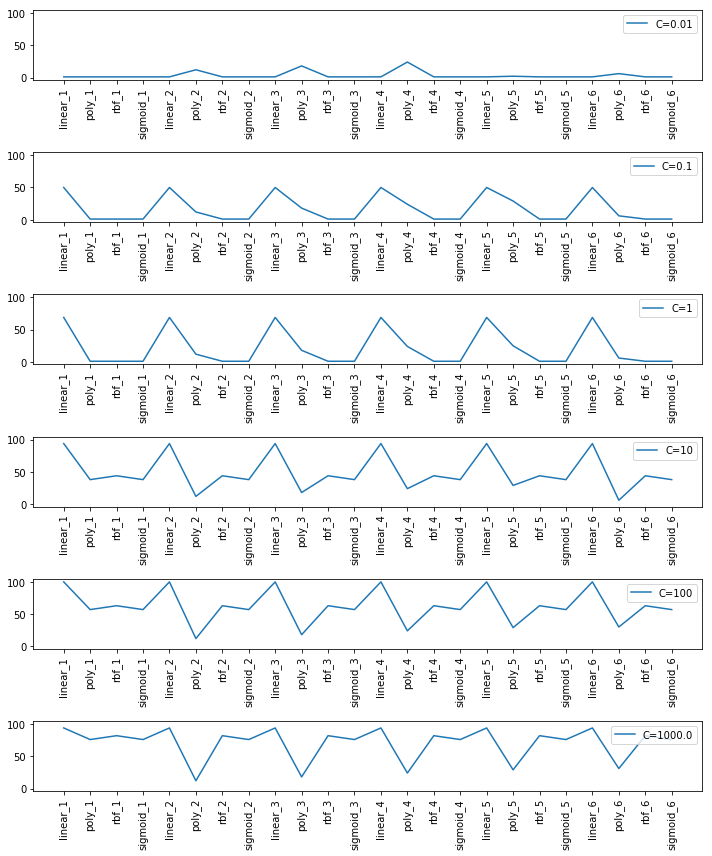

In [161]:
plot_search_params(params=params, dfpath=outputPath, 
                   param_fixed='C', xlabels_custom=['kernel', 'degree'])

In [199]:
%%time

# determine basis
clf_basis = LinearSVC(random_state=19, dual=False)
params = {
    'C': [.01, .1, .5, 1, 5, 10, 50, 100, 500, 1e3, 5e3, 1e4, 5e4, 1e5],
    'max_iter': [500, 1e3, 5e3, 1e4, 5e4, 1e5]
}
outputPath = os.path.join(paths['dir.dataroot'], 'records_CSV', 
                          '_final-gensim-GridSearchCV_linearSVC_02.csv')

# start to search
search_params(clf_basis, params, csvpath=outputPath)

LinearSVC(C=10, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=500,
     multi_class='ovr', penalty='l2', random_state=19, tol=0.0001,
     verbose=0)
0.861587413824
{'C': 10, 'max_iter': 500}


mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0       28.427366         0.110710         0.641329          0.658962    0.01   
1       28.738109         0.106904         0.641329          0.658962    0.01   
2       29.086411         0.118556         0.641329          0.658962    0.01   
3       29.433739         0.065165         0.641329          0.658962    0.01   
4       29.508736         0.085028         0.641329          0.658962    0.01   
5       30.453620         0.090933         0.641329          0.658962    0.01   
6       38.713030         0.057361         0.773025          0.798302     0.1   
7       38.976638         0.044625         0.773025          0.798302     0.1   
8       37.650412         0.065803         0.773025          0.798302     0.1   
9       38.809157         0.117043         0.773025          0.798302     0.1   
10      38.913705         0.058910         0.773025          0.798302     0.1   
11      39.517360         0.085142         0.773025          0.798302     0.1   
12      42.735731         0.090154         0.820311          0.866846     0.5   
13      41.716530         0.104641         0.820311          0.866846     0.5   
14      41.531069         0.071353         0.820311          0.866846     0.5   
15      41.798471         0.057396         0.820311          0.866846     0.5   
16      43.252368         0.052557         0.820311          0.866846     0.5   
17      42.692511         0.082207         0.820311          0.866846     0.5   
18      43.676776         0.090856         0.832243          0.894997       1   
19      43.148280         0.066369         0.832243          0.894997       1   
20      42.888918         0.043265         0.832243          0.894997       1   
21      42.614304         0.061273         0.832243          0.894997       1   
22      43.163173         0.069427         0.832243          0.894997       1   
23      43.489847         0.071102         0.832243          0.894997       1   
24      47.235036         0.058148         0.858494          0.950593       5   
25      45.916495         0.056693         0.858494          0.950593       5   
26      45.651863         0.044631         0.858494          0.950593       5   
27      45.658391         0.061495         0.858494          0.950593       5   
28      46.190444         0.115230         0.858494          0.950593       5   
29      47.106150         0.075918         0.858494          0.950593       5   
..            ...              ...              ...               ...     ...   
54     115.153361         0.071586         0.826675          0.999867    1000   
55     116.921749         0.057247         0.826675          0.999867    1000   
56     117.132547         0.070995         0.826675          0.999867    1000   
57     118.033781         0.056958         0.826675          0.999867    1000   
58     116.488725         0.061550         0.826675          0.999867    1000   
59     113.930453         0.060140         0.826675          0.999867    1000   
60     134.238996         0.070309         0.824288          0.999867    5000   
61     133.496205         0.042913         0.824288          0.999867    5000   
62     133.740618         0.056891         0.824288          0.999867    5000   
63     134.098852         0.083382         0.824288          0.999867    5000   
64     134.644298         0.056152         0.824288          0.999867    5000   
65     134.085372         0.069817         0.824288          0.999867    5000   
66     138.199154         0.058175         0.824112          0.999867   10000   
67     138.178926         0.069741         0.824112          0.999867   10000   
68     138.213140         0.043346         0.824112          0.999867   10000   
69     138.358089         0.055800         0.824112          0.999867   10000   
70     138.246670         0.042357         0.824112          0.999867   10000   
71     137.987719         0.070296 

CPU times: user 48.9 s, sys: 1.16 s, total: 50 s
Wall time: 43min 25s


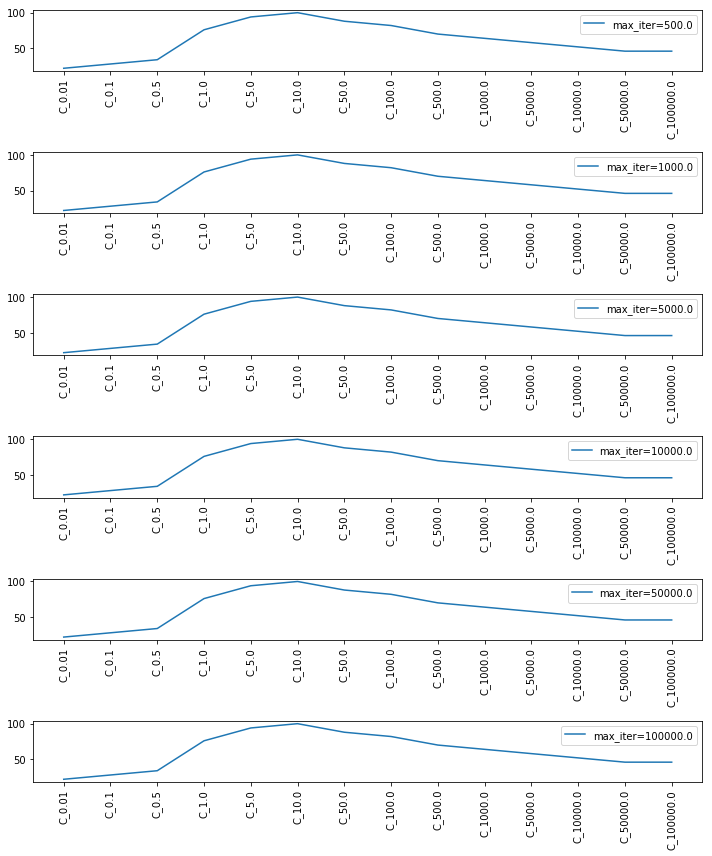

In [42]:
plot_search_params(params=params, dfpath=outputPath, 
                   param_fixed='max_iter', xlabels_custom=['C'])

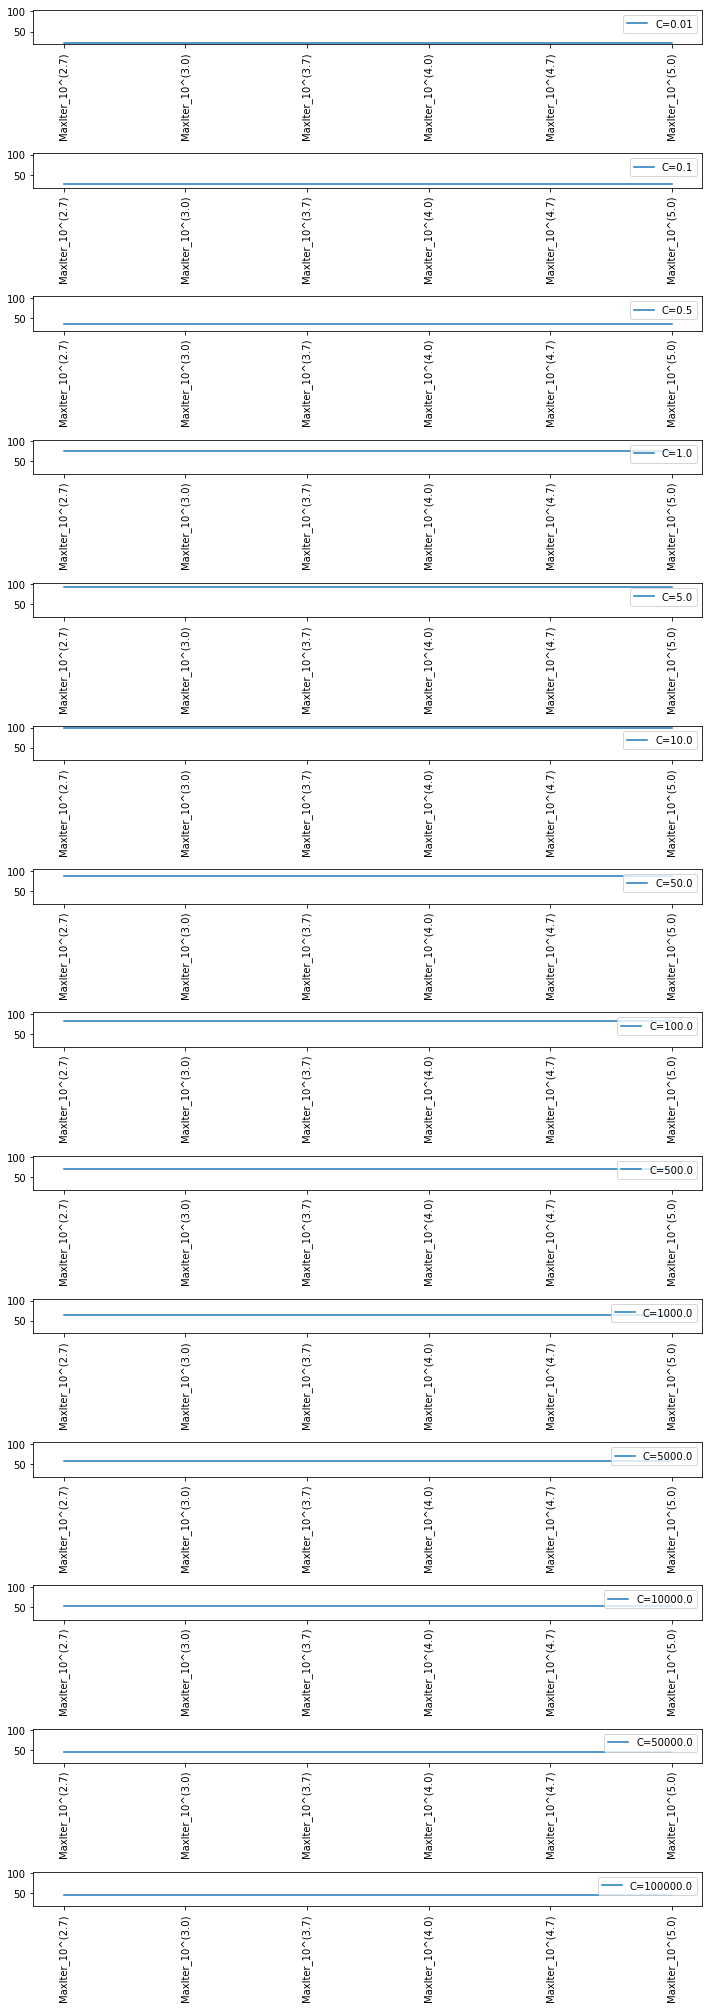

In [51]:
plot_search_params(params=params, dfpath=outputPath, 
                   param_fixed='C', xlabels_custom=['max_iter'])

In [53]:
clf_SVC00 = LinearSVC(random_state=19, dual=False)
clf_SVC00.fit(X_train_normal, y_train)
y_test_pred = clf_SVC00.predict(X_test_normal)
print('Primal: ', f1_score(y_test_true, y_test_pred, average='micro')) 

clf_SVC01 = LinearSVC(random_state=19, dual=False, C=10)
clf_SVC01.fit(X_train_normal, y_train)
y_test_pred = clf_SVC01.predict(X_test_normal)
print('Optimization: ', f1_score(y_test_true, y_test_pred, average='micro')) 

Primal:  0.776155071694
Optimization:  0.777482740308


##### D.2 RandomForest

In [200]:
%%time
# determine basis
clf_basis = RandomForestClassifier(random_state=19, n_jobs=-1)
params = {
    'n_estimators': [10, 20, 50, 100, 200, 500],
    'max_depth': [None, 3, 4, 6, 8, 10]
}
outputPath = os.path.join(paths['dir.dataroot'], 'records_CSV', 
                          '_final-gensim-GridSearchCV_RF_01.csv')

# start to search
search_params(clf_basis, params, csvpath=outputPath)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=19,
            verbose=0, warm_start=False)
0.752430616935
{'max_depth': None, 'n_estimators': 500}


mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0        2.130678         0.322002         0.478964          0.997127   
1        4.949488         0.435046         0.566024          0.999867   
2       14.471250         0.518143         0.654764          1.000000   
3       29.070869         0.773402         0.699576          1.000000   
4       57.838616         3.393898         0.731130          1.000000   
5      160.137794        21.254861         0.752431          1.000000   
6        3.453999         0.427167         0.329238          0.348421   
7        4.488555         0.428283         0.374050          0.402330   
8        7.432579         0.576330         0.411791          0.446477   
9        7.240273         2.142003         0.437688          0.469635   
10      18.261164         1.130134         0.449443          0.482983   
11      45.935002         2.345460         0.455011          0.487139   
12       3.726142         0.444335         0.384921          0.428492   
13       4.912718         0.409228         0.440870          0.491509   
14       8.846676         0.478686         0.477815          0.536235   
15       7.467954         2.119435         0.497437          0.556785   
16       6.047845         0.549784         0.513081          0.572519   
17      39.228203        12.943954         0.517589          0.580739   
18       4.110416         0.442568         0.457310          0.570222   
19       5.978189         0.539392         0.513170          0.657015   
20       5.575026         2.577938         0.580166          0.726005   
21      35.757450         8.253062         0.605887          0.751638   
22      24.963428        13.338503         0.618349          0.768961   
23      23.825003         3.157078         0.629751          0.781467   
24       9.838281         0.345206         0.477638          0.743547   
25      50.732155         7.769945         0.554711          0.838252   
26       3.610423         0.388434         0.626569          0.903748   
27       4.637423         1.204872         0.659537          0.927922   
28      32.264489         2.630118         0.679070          0.937202   
29      41.888890         1.324250         0.689411          0.942992   
30       2.783479         0.293459         0.488245          0.895791   
31       3.484687         0.409210         0.570797          0.963497   
32       7.004357        14.469850         0.648312          0.990100   
33       7.341621         0.808090         0.685257          0.994211   
34      21.419259         2.021132         0.704967          0.995757   
35      38.669127         8.718602         0.722645          0.996288   

   param_max_depth param_n_estimators  \
0             None                 10   
1             None                 20   
2             None                 50   
3             None                100   
4             None                200   
5             None                500   
6                3                 10   
7                3                 20   
8                3                 50   
9                3                100   
10               3                200   
11               3                500   
12               4                 10   
13               4                 20   
14               4                 50   
15               4                100   
16               4                200   
17               4                500   
18               6                 10   
19               6                 20   
20               6                 50   
21               6                100   
22               6                200   
23               6                500   
24               8                 10   
25               8                 20   
26               8                 50   
27               8                100   
28               8                200   
29               8                500   
30              10             

CPU times: user 3min 43s, sys: 867 ms, total: 3min 44s
Wall time: 12min 52s


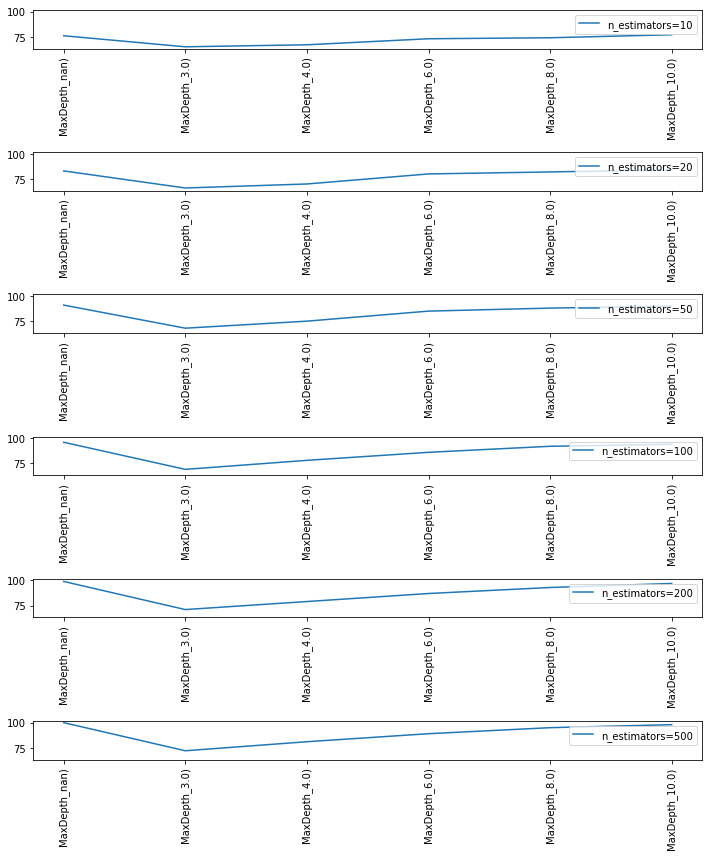

In [57]:
plot_search_params(params=params, dfpath=outputPath,
                   param_fixed='n_estimators', 
                   xlabels_custom=['max_depth'])

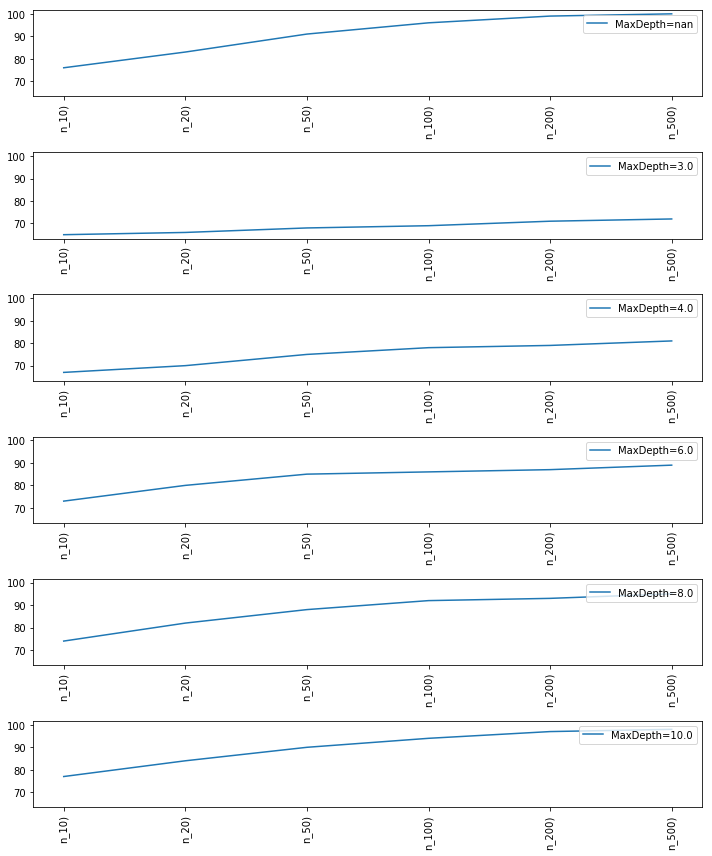

In [83]:
plot_search_params(params=params, dfpath=outputPath,
                   param_fixed='max_depth', 
                   xlabels_custom=['n_estimators'])

In [84]:
clf_RF00 = RandomForestClassifier(random_state=19, n_jobs=-1)
clf_RF00.fit(X_train_normal, y_train)
y_test_pred = clf_RF00.predict(X_test_normal)
print('Primal: ', f1_score(y_test_true, y_test_pred, average='micro')) 

clf_RF01 = RandomForestClassifier(random_state=19, n_jobs=-1, n_estimators=500)
clf_RF01.fit(X_train_normal, y_train)
y_test_pred = clf_RF01.predict(X_test_normal)
print('Optimization: ', f1_score(y_test_true, y_test_pred, average='micro')) 

Primal:  0.446494954859
Optimization:  0.686006372809


##### D.3 NN classifier

In [86]:
%%time
# determine basis
clf_basis = MLPClassifier(random_state=19)
params_NN_01= {
    'hidden_layer_sizes': [(100,), (250,), (500,), (750,), (1000,)]
}
outputPath = os.path.join(paths['dir.dataroot'], 'records_CSV', 
                          '_final-gensim-GridSearchCV_NN_01.csv')

# start to search
search_params(clf_basis, params_NN_01, csvpath=outputPath)

/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(750,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=19, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
0.84832950327
{'hidden_layer_sizes': (750,)}


mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0     212.835446         0.180096         0.844264          0.979804   
1     453.836017         0.260346         0.847269          0.995934   
2     551.849555         0.351391         0.844441          0.991026   
3     774.011339         0.297325         0.848330          0.998409   
4     733.930959         0.182713         0.847622          0.998099   

  param_hidden_layer_sizes                          params  rank_test_score  \
0                   (100,)  {'hidden_layer_sizes': (100,)}                5   
1                   (250,)  {'hidden_layer_sizes': (250,)}                3   
2                   (500,)  {'hidden_layer_sizes': (500,)}                4   
3                   (750,)  {'hidden_layer_sizes': (750,)}                1   
4                     1000    {'hidden_layer_sizes': 1000}                2   

   split0_test_score  split0_train_score  split1_test_score  \
0           0.836291            0.982756           0.853962   
1           0.839470            0.997347           0.860323   
2           0.840795            0.987266           0.851577   
3           0.845033            0.998674           0.858733   
4           0.839735            0.996286           0.860588   

   split1_train_score  split2_test_score  split2_train_score  std_fit_time  \
0            0.976528           0.842539            0.980127      5.355725   
1            0.993900           0.842007            0.996555      6.196541   
2            0.987933           0.840945            0.997880     73.035324   
3            0.999072           0.841211            0.997483    107.888929   
4            0.999337           0.842539            0.998675     24.280550   

   std_score_time  std_test_score  std_train_score  
0        0.006633        0.007319         0.002553  
1        0.024737        0.009292         0.001474  
2        0.040805        0.005048         0.004854  
3        0.033890        0.007522         0.000675  
4        0.082103        0.009242         0.001310

CPU times: user 10min 5s, sys: 11.2 s, total: 10min 16s
Wall time: 22min 49s


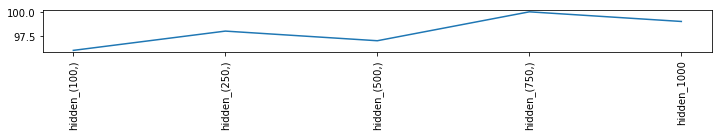

In [99]:
plot_search_params(params=params_NN_01, dfpath=outputPath)

In [88]:
%%time
# determine basis
clf_basis = MLPClassifier(random_state=19)
params_NN_02= {
    'max_iter': np.array(range(200, 900, 100))
}
outputPath = os.path.join(paths['dir.dataroot'], 'records_CSV', 
                          '_final-gensim-GridSearchCV_NN_02.csv')

# start to search
search_params(clf_basis, params_NN_02, csvpath=outputPath)

/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=19, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
0.847445642567
{'max_iter': 300}


mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0     197.219653         0.145649         0.844264          0.979804   
1     279.648494         0.180488         0.847446          0.996553   
2     342.430035         0.455078         0.845855          0.998011   
3     333.679820         0.435081         0.845855          0.998011   
4     336.130514         0.410191         0.845855          0.998011   
5     277.889201         0.165136         0.845855          0.998011   
6     201.095077         0.114189         0.845855          0.998011   

  param_max_iter             params  rank_test_score  split0_test_score  \
0            200  {'max_iter': 200}                7           0.836291   
1            300  {'max_iter': 300}                1           0.838675   
2            400  {'max_iter': 400}                2           0.838675   
3            500  {'max_iter': 500}                2           0.838675   
4            600  {'max_iter': 600}                2           0.838675   
5            700  {'max_iter': 700}                2           0.838675   
6            800  {'max_iter': 800}                2           0.838675   

   split0_train_score  split1_test_score  split1_train_score  \
0            0.982756           0.853962            0.976528   
1            0.997480           0.858203            0.995093   
2            0.997480           0.856348            0.997480   
3            0.997480           0.856348            0.997480   
4            0.997480           0.856348            0.997480   
5            0.997480           0.856348            0.997480   
6            0.997480           0.856348            0.997480   

   split2_test_score  split2_train_score  std_fit_time  std_score_time  \
0           0.842539            0.980127      2.736300        0.035716   
1           0.845459            0.997085      3.611719        0.017870   
2           0.842539            0.999073     55.525411        0.368284   
3           0.842539            0.999073     47.784168        0.367534   
4           0.842539            0.999073     39.136105        0.343261   
5           0.842539            0.999073      2.048449        0.071600   
6           0.842539            0.999073      3.440444        0.047512   

   std_test_score  std_train_score  
0        0.007319         0.002553  
1        0.008097         0.001044  
2        0.007588         0.000751  
3        0.007588         0.000751  
4        0.007588         0.000751  
5        0.007588         0.000751  
6        0.007588         0.000751

CPU times: user 3min 22s, sys: 3.33 s, total: 3min 26s
Wall time: 14min 29s


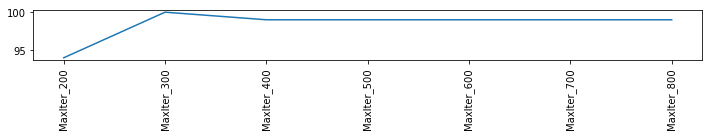

In [103]:
plot_search_params(params=params_NN_02, dfpath=outputPath)

In [90]:
%%time

# determine basis
clf_basis = MLPClassifier(random_state=19)
params_NN_03= {
    'alpha': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
}
outputPath = os.path.join(paths['dir.dataroot'], 'records_CSV', 
                          '_final-gensim-GridSearchCV_NN_03.csv')

# start to search
search_params(clf_basis, params_NN_03, csvpath=outputPath)

/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=19, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
0.853544281421
{'alpha': 0.01}


/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0     187.975721         0.169001         0.845324          0.979495   
1     197.513886         0.165145         0.845324          0.979539   
2     190.347835         0.188639         0.845324          0.979583   
3     194.428447         0.123546         0.845678          0.979583   
4     202.955556         0.154103         0.844264          0.979804   
5     196.535923         0.122849         0.845324          0.979053   
6     184.273844         0.088909         0.853544          0.967607   
7     110.312353         0.171970         0.813859          0.866582   
8      38.804458         0.159094         0.394290          0.398753   
9      16.915060         0.089051         0.052943          0.052943   

  param_alpha             params  rank_test_score  split0_test_score  \
0       1e-08   {'alpha': 1e-08}                3           0.836556   
1       1e-07   {'alpha': 1e-07}                3           0.837086   
2       1e-06   {'alpha': 1e-06}                3           0.837616   
3       1e-05   {'alpha': 1e-05}                2           0.838411   
4      0.0001  {'alpha': 0.0001}                7           0.836291   
5       0.001   {'alpha': 0.001}                3           0.836821   
6        0.01    {'alpha': 0.01}                1           0.847417   
7         0.1     {'alpha': 0.1}                8           0.811126   
8           1       {'alpha': 1}                9           0.381987   
9          10      {'alpha': 10}               10           0.052980   

   split0_train_score  split1_test_score  split1_train_score  \
0            0.983420           0.856878            0.975202   
1            0.983552           0.856878            0.975202   
2            0.983685           0.856613            0.975202   
3            0.983420           0.856613            0.975335   
4            0.982756           0.853962            0.976528   
5            0.981960           0.857408            0.975865   
6            0.972675           0.862974            0.961941   
7            0.880753           0.812616            0.852142   
8            0.387187           0.409488            0.410290   
9            0.052925           0.053008            0.052911   

   split2_test_score  split2_train_score  std_fit_time  std_score_time  \
0           0.842539            0.979862      5.584124        0.007538   
1           0.842007            0.979862      8.151745        0.005740   
2           0.841742            0.979862      4.468604        0.039425   
3           0.842007            0.979995      2.850436        0.023481   
4           0.842539            0.980127      6.800505        0.018339   
5           0.841742            0.979332      5.586206        0.036543   
6           0.850239            0.968203      7.152090        0.039379   
7           0.817844            0.866852      9.121601        0.005894   
8           0.391397            0.398781      5.221760        0.004622   
9           0.052841            0.052994      1.513268        0.050030   

   std_test_score  std_train_score  
0        0.008529         0.003365  
1        0.008416         0.003417  
2        0.008160         0.003469  
3        0.007873         0.003313  
4        0.007319         0.002553  
5        0.008780         0.002496  
6        0.006769         0.004402  
7        0.002880         0.011682  
8        0.011416         0.009432  
9        0.000073         0.000036

CPU times: user 2min 25s, sys: 2.61 s, total: 2min 27s
Wall time: 10min 13s


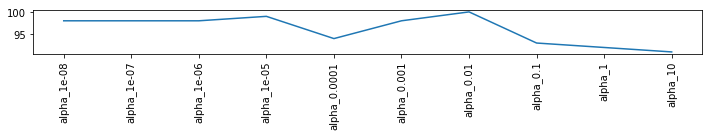

In [104]:
plot_search_params(params=params_NN_03, dfpath=outputPath)

In [102]:
clf_NN00 = MLPClassifier(random_state=19)
clf_NN00.fit(X_train_normal, y_train)
y_test_pred = clf_NN00.predict(X_test_normal)
print('Primal: ', f1_score(y_test_true, y_test_pred, average='micro')) 

clf_NN01 = MLPClassifier(random_state=19, hidden_layer_sizes=750, max_iter=300, alpha=0.01)
clf_NN01.fit(X_train_normal, y_train)
y_test_pred = clf_NN01.predict(X_test_normal)
print('Optimization: ', f1_score(y_test_true, y_test_pred, average='micro')) 

/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Primal:  0.761683483802
Optimization:  0.77004779607


## 4. 数据总结

In [ ]:
paths

In [ ]:
pathCSV_root = os.path.join(paths['dir.dataroot'], 'records_CSV')

records_df_raw.to_csv(os.path.join(pathCSV_root, '_final-gensim-16-raw.csv'))

records_df_display.to_csv(os.path.join(pathCSV_root, '_final-gensim-16-display.csv'))

In [140]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.ensemble import RandomForestClassifier


# change from: 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5),
                        outData=False, estName=None, outVerbose=0):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1_micro', verbose=outVerbose)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    
    if outData and estName:
        # DataFrame
        tmpdata = pd.DataFrame({
            'train_size': train_sizes, 
            'train_score_mean': train_scores_mean, 
            'train_score_std': train_scores_std,
            'test_score_mean': test_scores_mean,
            'test_score_std': test_scores_std
        })
        
        # path
        pathCSV_root = os.path.join(paths['dir.dataroot'], 'records_CSV')
        tmpdata.to_csv(os.path.join(pathCSV_root, '_final-gensim-learningCurves-{}.csv'.format(estName)))
    
    return plt


X, y = X_train_normal, y_train

In [141]:
def groupCurves(estimators, names, ylim_lower=0, ylim_upper=1.01, 
                outDataFlag=False, outVerboseFlag=0):
    # to compare learning_curves of estimators,
    # we must plot each of them
    if len(estimators) == len(names):
        for iEstimator, iName in zip(estimators, names):
            title = "Learning Curves ({})".format(iName)
            estimator = iEstimator
            plot_learning_curve(estimator, title, X, y, ylim=(ylim_lower, ylim_upper), n_jobs=-1, 
                                outData=outDataFlag, outVerbose=outVerboseFlag,
                                estName=(iName if outDataFlag else None))
            print("Finished CV(show the curve below):", iName)
            plt.show()

Finished CV(show the curve below): LinearSVC[C=0.01]


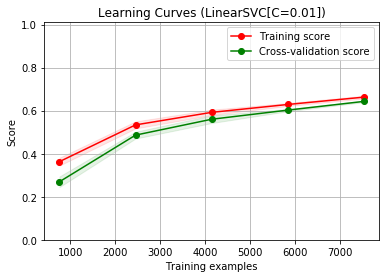

Finished CV(show the curve below): LinearSVC[C=0.1]


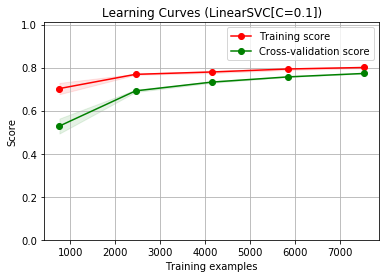

Finished CV(show the curve below): LinearSVC[C=1]


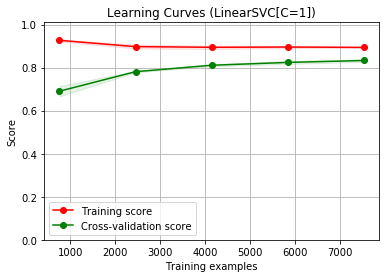

Finished CV(show the curve below): LinearSVC[C=10]


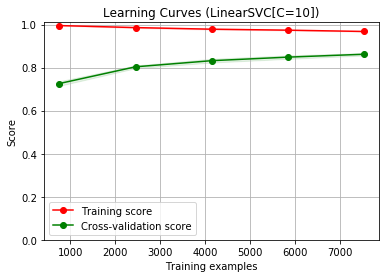

Finished CV(show the curve below): LinearSVC[C=100]


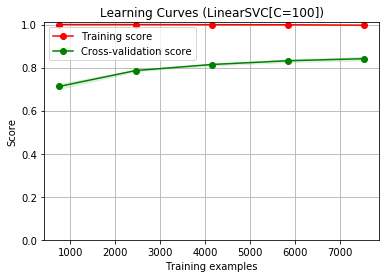

Finished CV(show the curve below): LinearSVC[C=1000.0]


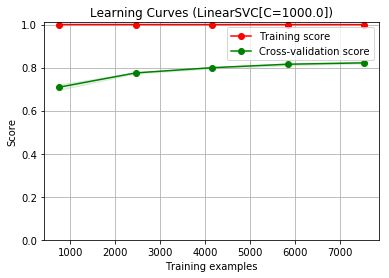

Finished CV(show the curve below): LinearSVC[C=10000.0]


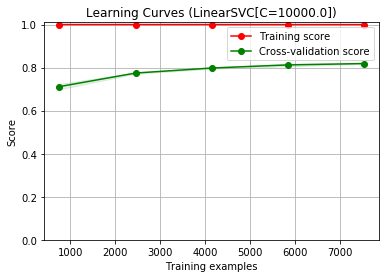

Finished CV(show the curve below): LinearSVC[C=100000.0]


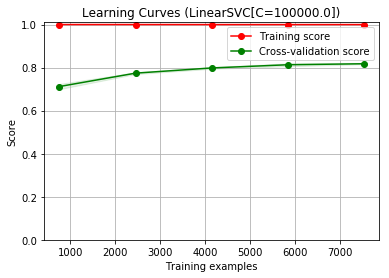

CPU times: user 17.2 s, sys: 1.38 s, total: 18.6 s
Wall time: 10min 27s


In [143]:
%%time

curves_linearSVC_Clist = [.01, .1, 1, 10, 100, 1e3, 1e4, 1e5]
curves_linearSVC_est = [LinearSVC(random_state=19, dual=False, C=eachC) for eachC in curves_linearSVC_Clist]
curves_linearSVC_nam = ['LinearSVC[C={}]'.format(eachC) for eachC in curves_linearSVC_Clist]
groupCurves(curves_linearSVC_est, curves_linearSVC_nam, outDataFlag=True)

In [207]:
def stat_estimators(list_names, list_params, param_check):
    import matplotlib.pyplot as plt
    # init
    delta_train_test = []
    score_train = []
    score_test = []
    
    # show some statistics using DataFrame
    for i, eachC in zip(list_names, list_params):
        print('Data from LearningCurve of: ', i)
        pathCSV_root = outputPath = os.path.join(paths['dir.dataroot'], 'records_CSV')
        tmpdf_learningCurve = pd.read_csv(os.path.join(pathCSV_root, 
                                                       '_final-gensim-learningCurves-{}.csv'.format(i)))
        tmpdf_learningCurve.drop(['Unnamed: 0'], axis=1, inplace=True)
        display(tmpdf_learningCurve)
        tmpd_stat = {}
        for j in tmpdf_learningCurve.columns[:-1]: # except the column: train_size
            tmpd_stat[j] = [np.mean(tmpdf_learningCurve[j])]
        tmpdf_stat = pd.DataFrame(tmpd_stat, columns=tmpdf_learningCurve.columns[:-1]) # except the column: train_size
        display(tmpdf_stat)
        delta = np.mean(tmpdf_learningCurve['train_score_mean']) - np.mean(tmpdf_learningCurve['test_score_mean'])
        delta_train_test.append(delta)
        score_train.append(np.mean(tmpdf_learningCurve['train_score_mean']))
        score_test.append(np.mean(tmpdf_learningCurve['test_score_mean']))
        print('Mean of [{}] - Mean of [{}] = {}'.format(
            'train_score_mean',
            'test_score_mean',
            delta
        ))
        print('====================================================================================================')
        print('====================================================================================================')
    
    df_delta = pd.DataFrame({param_check: list_params, 
                             'train': score_train, 'validation': score_test,
                             'delta': delta_train_test}, columns=[param_check, 'train', 'validation', 'delta'])
    
    # plot the statistics
    plt.plot(np.log10(list_params), score_train, 'r', label='train')
    plt.plot(np.log10(list_params), score_test, 'g', label='validation')
    plt.plot(np.log10(list_params), delta_train_test, 'b', label='delta')
    plt.xticks(np.log10(list_params), 
               ['10^({})'.format(i) for i in np.log10(list_params)],
              rotation='vertical')
    plt.legend(loc='upper left')
    plt.show()
    display(df_delta)

Data from LearningCurve of:  LinearSVC[C=0.01]


test_score_mean  test_score_std  train_score_mean  train_score_std  \
0         0.269506        0.024616          0.362992         0.018155   
1         0.486224        0.015876          0.533741         0.016355   
2         0.559944        0.017526          0.591976         0.012468   
3         0.602267        0.005242          0.628495         0.006899   
4         0.642836        0.003608          0.662643         0.006473   

   train_size  
0         753  
1        2450  
2        4146  
3        5842  
4        7539

test_score_mean  test_score_std  train_score_mean  train_score_std
0         0.512155        0.013373           0.55597          0.01207

Mean of [train_score_mean] - Mean of [test_score_mean] = 0.0438142960381851
Data from LearningCurve of:  LinearSVC[C=0.1]


test_score_mean  test_score_std  train_score_mean  train_score_std  \
0         0.528392        0.034782          0.702523         0.026293   
1         0.691715        0.005453          0.768571         0.002309   
2         0.732458        0.003397          0.779466         0.004999   
3         0.756674        0.000448          0.793336         0.004420   
4         0.772671        0.000600          0.800371         0.003504   

   train_size  
0         753  
1        2450  
2        4146  
3        5842  
4        7539

test_score_mean  test_score_std  train_score_mean  train_score_std
0         0.696382        0.008936          0.768854         0.008305

Mean of [train_score_mean] - Mean of [test_score_mean] = 0.07247165941559286
Data from LearningCurve of:  LinearSVC[C=1]


test_score_mean  test_score_std  train_score_mean  train_score_std  \
0         0.690220        0.024250          0.926516         0.005008   
1         0.780892        0.003359          0.897279         0.008851   
2         0.810770        0.004702          0.894195         0.008130   
3         0.823851        0.007316          0.895355         0.005009   
4         0.832864        0.006379          0.893752         0.003174   

   train_size  
0         753  
1        2450  
2        4146  
3        5842  
4        7539

test_score_mean  test_score_std  train_score_mean  train_score_std
0          0.78772        0.009201           0.90142         0.006034

Mean of [train_score_mean] - Mean of [test_score_mean] = 0.11370012442702904
Data from LearningCurve of:  LinearSVC[C=10]


test_score_mean  test_score_std  train_score_mean  train_score_std  \
0         0.725921        0.010694          0.995131         0.000626   
1         0.803519        0.006450          0.985714         0.002309   
2         0.831983        0.008702          0.978292         0.002193   
3         0.848421        0.008037          0.973753         0.001468   
4         0.861853        0.005834          0.967723         0.001292   

   train_size  
0         753  
1        2450  
2        4146  
3        5842  
4        7539

test_score_mean  test_score_std  train_score_mean  train_score_std
0         0.814339        0.007944          0.980123         0.001578

Mean of [train_score_mean] - Mean of [test_score_mean] = 0.16578328226310235
Data from LearningCurve of:  LinearSVC[C=100]


test_score_mean  test_score_std  train_score_mean  train_score_std  \
0         0.712486        0.011782          1.000000         0.000000   
1         0.786105        0.003830          0.999864         0.000192   
2         0.814215        0.004627          0.999357         0.000227   
3         0.831624        0.006728          0.998802         0.000640   
4         0.841258        0.008138          0.997038         0.000662   

   train_size  
0         753  
1        2450  
2        4146  
3        5842  
4        7539

test_score_mean  test_score_std  train_score_mean  train_score_std
0         0.797137        0.007021          0.999012         0.000344

Mean of [train_score_mean] - Mean of [test_score_mean] = 0.20187458393364066
Data from LearningCurve of:  LinearSVC[C=1000.0]


test_score_mean  test_score_std  train_score_mean  train_score_std  \
0         0.709126        0.013100          1.000000         0.000000   
1         0.775147        0.003107          1.000000         0.000000   
2         0.799275        0.004177          0.999839         0.000227   
3         0.815449        0.004938          0.999886         0.000081   
4         0.821993        0.003394          0.999779         0.000125   

   train_size  
0         753  
1        2450  
2        4146  
3        5842  
4        7539

test_score_mean  test_score_std  train_score_mean  train_score_std
0         0.784198        0.005743          0.999901         0.000087

Mean of [train_score_mean] - Mean of [test_score_mean] = 0.21570305041527638
Data from LearningCurve of:  LinearSVC[C=10000.0]


test_score_mean  test_score_std  train_score_mean  train_score_std  \
0         0.711513        0.012923          1.000000         0.000000   
1         0.774528        0.003311          1.000000         0.000000   
2         0.797860        0.003877          1.000000         0.000000   
3         0.812265        0.006396          0.999829         0.000140   
4         0.818632        0.002132          0.999867         0.000108   

   train_size  
0         753  
1        2450  
2        4146  
3        5842  
4        7539

test_score_mean  test_score_std  train_score_mean  train_score_std
0          0.78296        0.005728          0.999939          0.00005

Mean of [train_score_mean] - Mean of [test_score_mean] = 0.21697958132094408
Data from LearningCurve of:  LinearSVC[C=100000.0]


test_score_mean  test_score_std  train_score_mean  train_score_std  \
0         0.711956        0.012298          1.000000         0.000000   
1         0.774087        0.004371          1.000000         0.000000   
2         0.798214        0.004073          0.999839         0.000227   
3         0.813060        0.006864          0.999829         0.000140   
4         0.817749        0.002558          0.999867         0.000108   

   train_size  
0         753  
1        2450  
2        4146  
3        5842  
4        7539

test_score_mean  test_score_std  train_score_mean  train_score_std
0         0.783013        0.006033          0.999907         0.000095

Mean of [train_score_mean] - Mean of [test_score_mean] = 0.2168940759612119


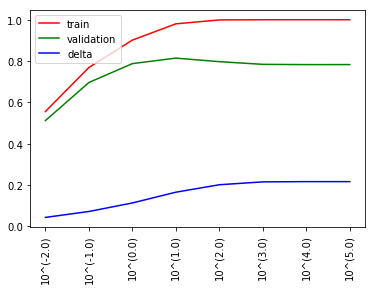

C     train  validation     delta
0       0.01  0.555970    0.512155  0.043814
1       0.10  0.768854    0.696382  0.072472
2       1.00  0.901420    0.787720  0.113700
3      10.00  0.980123    0.814339  0.165783
4     100.00  0.999012    0.797137  0.201875
5    1000.00  0.999901    0.784198  0.215703
6   10000.00  0.999939    0.782960  0.216980
7  100000.00  0.999907    0.783013  0.216894

In [184]:
stat_estimators(curves_linearSVC_nam, curves_linearSVC_Clist, 'C')

/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Finished CV(show the curve below): MLPClassifier[alpha=1e-08]


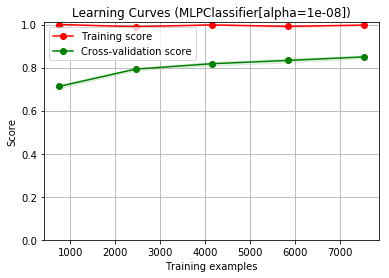

/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Finished CV(show the curve below): MLPClassifier[alpha=1e-07]


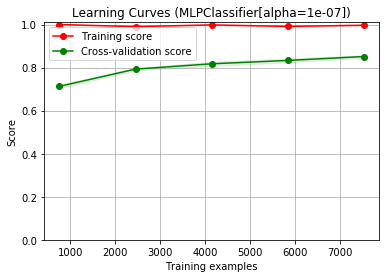

/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Finished CV(show the curve below): MLPClassifier[alpha=1e-06]


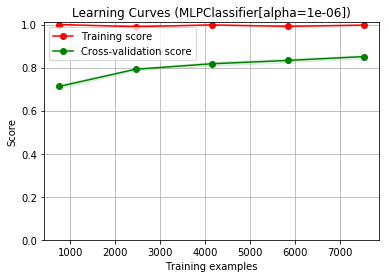

/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Finished CV(show the curve below): MLPClassifier[alpha=1e-05]


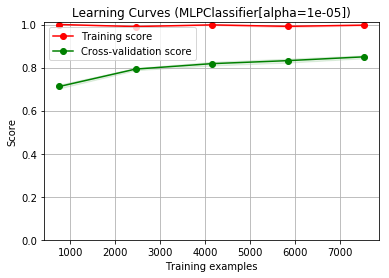

/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Finished CV(show the curve below): MLPClassifier[alpha=0.0001]


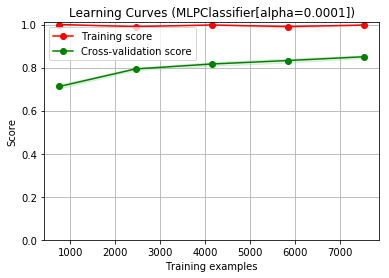

/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Finished CV(show the curve below): MLPClassifier[alpha=0.001]


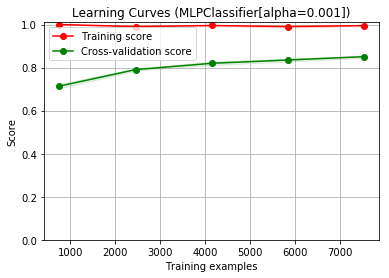

/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Finished CV(show the curve below): MLPClassifier[alpha=0.01]


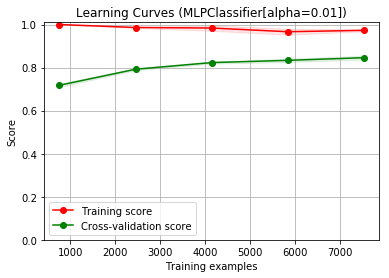

Finished CV(show the curve below): MLPClassifier[alpha=0.1]


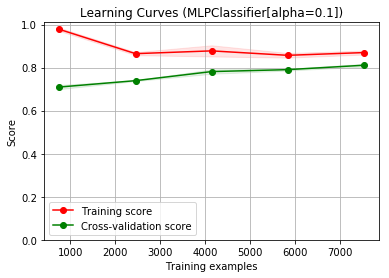

Finished CV(show the curve below): MLPClassifier[alpha=1]


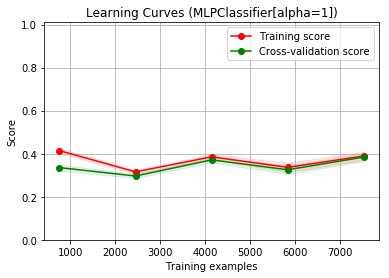

Finished CV(show the curve below): MLPClassifier[alpha=10]


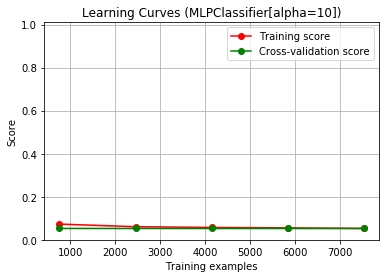

CPU times: user 32.7 s, sys: 2.98 s, total: 35.6 s
Wall time: 2h 4min 37s


In [168]:
%%time

curves_NN_alphaList = [1e-8, 1e-7, 1e-6, 1e-5, 
                       1e-4, 1e-3, 1e-2, 1e-1, 
                       1, 10]
curves_NN_est = [MLPClassifier(random_state=19, hidden_layer_sizes=750, max_iter=300, alpha=eachAlpha) 
                 for eachAlpha in curves_NN_alphaList]
curves_NN_nam = ['MLPClassifier[alpha={}]'.format(eachAlpha) 
                 for eachAlpha in curves_NN_alphaList]
groupCurves(curves_NN_est, curves_NN_nam, outDataFlag=True)

Data from LearningCurve of:  MLPClassifier[alpha=1e-08]


test_score_mean  test_score_std  train_score_mean  train_score_std  \
0         0.712748        0.009031          1.000000         0.000000   
1         0.792824        0.005625          0.990204         0.000577   
2         0.817837        0.008970          0.998312         0.002056   
3         0.833040        0.009340          0.991327         0.005128   
4         0.849477        0.006735          0.997391         0.002101   

   train_size  
0         753  
1        2450  
2        4146  
3        5842  
4        7539

test_score_mean  test_score_std  train_score_mean  train_score_std
0         0.801185         0.00794          0.995447         0.001973

Mean of [train_score_mean] - Mean of [test_score_mean] = 0.19426189466518562
Data from LearningCurve of:  MLPClassifier[alpha=1e-07]


test_score_mean  test_score_std  train_score_mean  train_score_std  \
0         0.712747        0.008918          1.000000         0.000000   
1         0.792824        0.005840          0.990204         0.000577   
2         0.817484        0.009601          0.998231         0.002169   
3         0.833040        0.009085          0.991156         0.005124   
4         0.851245        0.006318          0.996684         0.002108   

   train_size  
0         753  
1        2450  
2        4146  
3        5842  
4        7539

test_score_mean  test_score_std  train_score_mean  train_score_std
0         0.801468        0.007952          0.995255         0.001996

Mean of [train_score_mean] - Mean of [test_score_mean] = 0.1937869467620984
Data from LearningCurve of:  MLPClassifier[alpha=1e-06]


test_score_mean  test_score_std  train_score_mean  train_score_std  \
0         0.712571        0.009137          1.000000         0.000000   
1         0.792205        0.005295          0.990204         0.000577   
2         0.817572        0.009186          0.998231         0.002169   
3         0.833040        0.009516          0.991498         0.004882   
4         0.850979        0.007357          0.997303         0.002226   

   train_size  
0         753  
1        2450  
2        4146  
3        5842  
4        7539

test_score_mean  test_score_std  train_score_mean  train_score_std
0         0.801273        0.008098          0.995447         0.001971

Mean of [train_score_mean] - Mean of [test_score_mean] = 0.1941739747179605
Data from LearningCurve of:  MLPClassifier[alpha=1e-05]


test_score_mean  test_score_std  train_score_mean  train_score_std  \
0         0.712216        0.009034          1.000000         0.000000   
1         0.792912        0.005526          0.990612         0.000577   
2         0.818191        0.008745          0.998312         0.002056   
3         0.832156        0.009403          0.991441         0.004963   
4         0.849829        0.007091          0.997170         0.002316   

   train_size  
0         753  
1        2450  
2        4146  
3        5842  
4        7539

test_score_mean  test_score_std  train_score_mean  train_score_std
0         0.801061         0.00796          0.995507         0.001982

Mean of [train_score_mean] - Mean of [test_score_mean] = 0.1944461455300488
Data from LearningCurve of:  MLPClassifier[alpha=0.0001]


test_score_mean  test_score_std  train_score_mean  train_score_std  \
0         0.712217        0.009457          1.000000         0.000000   
1         0.793619        0.006187          0.990476         0.000770   
2         0.816509        0.009185          0.997910         0.001640   
3         0.832597        0.009725          0.990471         0.005034   
4         0.850184        0.006985          0.997524         0.001914   

   train_size  
0         753  
1        2450  
2        4146  
3        5842  
4        7539

test_score_mean  test_score_std  train_score_mean  train_score_std
0         0.801025        0.008308          0.995276         0.001872

Mean of [train_score_mean] - Mean of [test_score_mean] = 0.19425102866873645
Data from LearningCurve of:  MLPClassifier[alpha=0.001]


test_score_mean  test_score_std  train_score_mean  train_score_std  \
0         0.713807        0.010477          1.000000         0.000000   
1         0.790525        0.005472          0.990476         0.000770   
2         0.819781        0.008197          0.995417         0.002914   
3         0.835073        0.007539          0.990357         0.005423   
4         0.850536        0.006293          0.994827         0.002588   

   train_size  
0         753  
1        2450  
2        4146  
3        5842  
4        7539

test_score_mean  test_score_std  train_score_mean  train_score_std
0         0.801944        0.007596          0.994216         0.002339

Mean of [train_score_mean] - Mean of [test_score_mean] = 0.1922711352622295
Data from LearningCurve of:  MLPClassifier[alpha=0.01]


test_score_mean  test_score_std  train_score_mean  train_score_std  \
0         0.717786        0.007673          1.000000         0.000000   
1         0.792203        0.004878          0.986122         0.002309   
2         0.823136        0.004859          0.983679         0.012947   
3         0.833475        0.007928          0.966450         0.013765   
4         0.845858        0.008841          0.972896         0.004869   

   train_size  
0         753  
1        2450  
2        4146  
3        5842  
4        7539

test_score_mean  test_score_std  train_score_mean  train_score_std
0         0.802492        0.006836           0.98183         0.006778

Mean of [train_score_mean] - Mean of [test_score_mean] = 0.1793379712689941
Data from LearningCurve of:  MLPClassifier[alpha=0.1]


test_score_mean  test_score_std  train_score_mean  train_score_std  \
0         0.709565        0.009673          0.977424         0.007512   
1         0.739260        0.001931          0.864626         0.007119   
2         0.781412        0.010329          0.877553         0.025907   
3         0.790352        0.004231          0.856898         0.010805   
4         0.810860        0.006426          0.869611         0.009342   

   train_size  
0         753  
1        2450  
2        4146  
3        5842  
4        7539

test_score_mean  test_score_std  train_score_mean  train_score_std
0          0.76629        0.006518          0.889222         0.012137

Mean of [train_score_mean] - Mean of [test_score_mean] = 0.12293252814566369
Data from LearningCurve of:  MLPClassifier[alpha=1]


test_score_mean  test_score_std  train_score_mean  train_score_std  \
0         0.335346        0.014671          0.414343         0.013147   
1         0.296175        0.009167          0.315646         0.008851   
2         0.371145        0.012302          0.385432         0.011749   
3         0.325356        0.020164          0.336472         0.021935   
4         0.384306        0.018716          0.389220         0.019353   

   train_size  
0         753  
1        2450  
2        4146  
3        5842  
4        7539

test_score_mean  test_score_std  train_score_mean  train_score_std
0         0.342465        0.015004          0.368223         0.015007

Mean of [train_score_mean] - Mean of [test_score_mean] = 0.02575704633961534
Data from LearningCurve of:  MLPClassifier[alpha=10]


test_score_mean  test_score_std  train_score_mean  train_score_std  \
0         0.052855        0.000097          0.073041         0.003756   
1         0.052855        0.000097          0.060952         0.000192   
2         0.052678        0.000151          0.057566         0.000746   
3         0.052767        0.000054          0.055460         0.000850   
4         0.052767        0.000234          0.052836         0.000225   

   train_size  
0         753  
1        2450  
2        4146  
3        5842  
4        7539

test_score_mean  test_score_std  train_score_mean  train_score_std
0         0.052784        0.000127          0.059971         0.001154

Mean of [train_score_mean] - Mean of [test_score_mean] = 0.007186979762646477


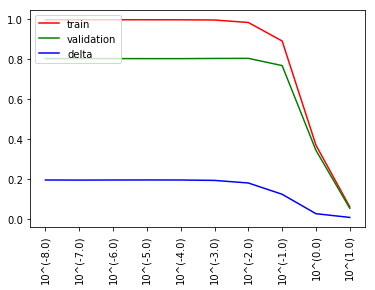

alpha     train  validation     delta
0  1.000000e-08  0.995447    0.801185  0.194262
1  1.000000e-07  0.995255    0.801468  0.193787
2  1.000000e-06  0.995447    0.801273  0.194174
3  1.000000e-05  0.995507    0.801061  0.194446
4  1.000000e-04  0.995276    0.801025  0.194251
5  1.000000e-03  0.994216    0.801944  0.192271
6  1.000000e-02  0.981830    0.802492  0.179338
7  1.000000e-01  0.889222    0.766290  0.122933
8  1.000000e+00  0.368223    0.342465  0.025757
9  1.000000e+01  0.059971    0.052784  0.007187

In [186]:
stat_estimators(curves_NN_nam, curves_NN_alphaList, 'alpha')

In [190]:
def plot_with_labels(low_dim_embs, labels, filename='tsne.png', isRainbow=False):
    # ref: https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/word2vec/word2vec_basic.py#L236
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
    plt.figure(figsize=(18, 18))  # in inches
    if isRainbow:
        colors = cm.rainbow(np.linspace(0, 1, len(pd.Series(labels).unique())))
        colordict = {i:c for i, c in zip(pd.Series(labels).unique(), colors)}
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        if isRainbow:
            plt.scatter(x, y, c=colordict[label])
        else:
            plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

#     # don't use plt.show, or else savgfig will output empty image
#     # use savefig directly, it will show the image in the notebook
#     plt.show()
    plt.savefig(filename)

In [191]:
def plot_model(finals, reverses, plot_num=None, isWord=True, fname='tsne-word2vec.png'):
    # ref: https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/word2vec/word2vec_basic.py#L251
    try:
        # define embeddings
        final_embeddings = finals
        reverse_dictionary = reverses

        # pylint: disable=g-import-not-at-top
        from sklearn.manifold import TSNE
        import matplotlib.pyplot as plt

        tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
        if isWord:
            plot_only = 2000 if plot_num is None else plot_only
        else:
            plot_only = X_tsne.shape[0]
        low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only, :])
        labels = [reverse_dictionary[i] for i in range(plot_only)]
        plot_with_labels(low_dim_embs, labels, filename=fname, 
                         isRainbow=False if isWord else True)
    except ImportError:
        print('Please install sklearn, matplotlib, and scipy to show embeddings.')

In [192]:
def getDocData_tsne(num):
    # Read data and save it in data['vec.train'] 和 data['vec.test']
    data_tsne = {}
    data_tsne['vec.test'] = {w2v_tag:[], 'class':[]}
    pickSome = num
    
    for tpart in ['test']:
        dirpath = paths['dir.{}'.format(tpart)]
        dirs_all_tsne = os.listdir(dirpath)
        dirs_randInds_tsne = random.sample(range(len(dirs_all_tsne)), pickSome)
        dirs_rands_tsne = [dirs_all_tsne[i] for i in dirs_randInds_tsne]
        for (ind, cls) in enumerate(dirs_rands_tsne):
            clspath = os.path.join(dirpath, cls)
            files = os.listdir(clspath)
            for f in files:
                fpath = os.path.join(clspath, f)
                # Start to represent a document
                with open(fpath, 'r') as readf:
                    tokens = [token for token in readf.read().split()]
                    vec = np.array([0.0 for i in range(vecsize)])
                    expectationVal = np.array([0.0 for i in range(vecsize)])
                    countvec = 0
                    for token in tokens:
                        try:
                            vec += model[token]
                            countvec += 1
                        except:
                            vec += expectationVal
                    vec = vec / float(countvec)
        
                data_tsne['vec.{}'.format(tpart)][w2v_tag].append(vec)
                data_tsne['vec.{}'.format(tpart)]['class'].append(cls)
        
        
    # Save in Pandas.DataFrame
    # 将 data['matrix.train'] 与 data['matrix.test'] 转换成 Pandas.DataFrame 格式，
    # 保存到 df['train'] 和 df['test'] 中（df 为字典格式：String -> DataFrame）
        df_tsne = {}
        datadict_tsne = {}
        datadict_tsne['class'] = data_tsne['vec.{}'.format(tpart)]['class']
        datavec_tsne = np.array(data_tsne['vec.{}'.format(tpart)][w2v_tag])
        for col in range(vecsize):#+1): #
            datadict_tsne[col]= datavec_tsne[:, col]
        
        df_tsne[tpart] = pd.DataFrame(data=datadict_tsne)
        df_tsne[tpart] = df_tsne[tpart].sample(frac=1)
        df_tsne[tpart].reset_index(drop=True, inplace=True)
#         display(df_tsne[tpart])
    return df_tsne['test'].drop('class', axis=1), df_tsne['test']['class']

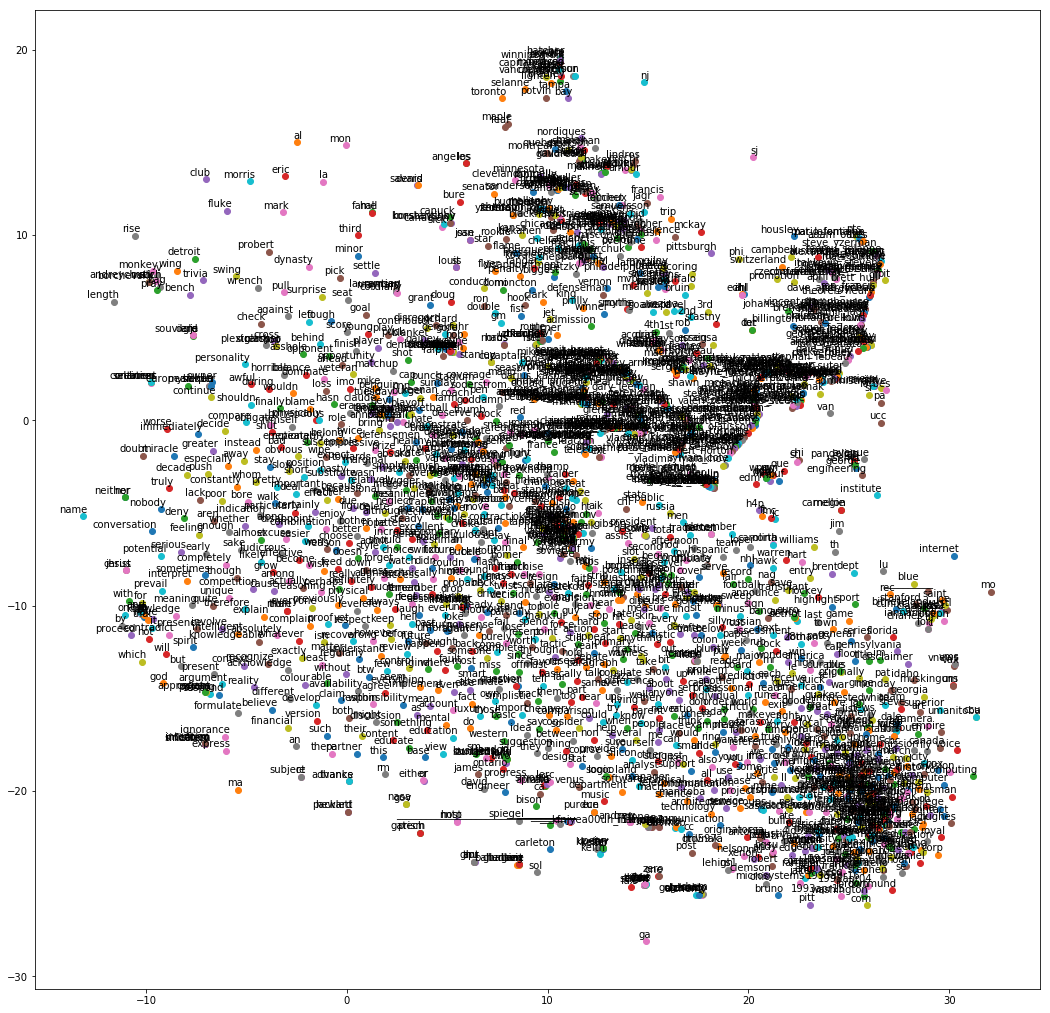

In [405]:
plot_model(finals=model[model.wv.vocab], reverses=list(model.wv.vocab.keys()))

In [390]:
# Store data in X_tsne, y_tsne
X_tsne, y_tsne_true = getDocData_tsne(3)
y_tsne_true.unique()

array(['rec.motorcycles', 'comp.graphics', 'talk.religion.misc'], dtype=object)

In [391]:
pathCSV_root = os.path.join(paths['dir.dataroot'], 'records_CSV')
X_tsne.to_csv(os.path.join(pathCSV_root, '_final-tsne-01-X.csv'))
y_tsne_true.to_csv(os.path.join(pathCSV_root, '_final-tsne-01-y.csv'))

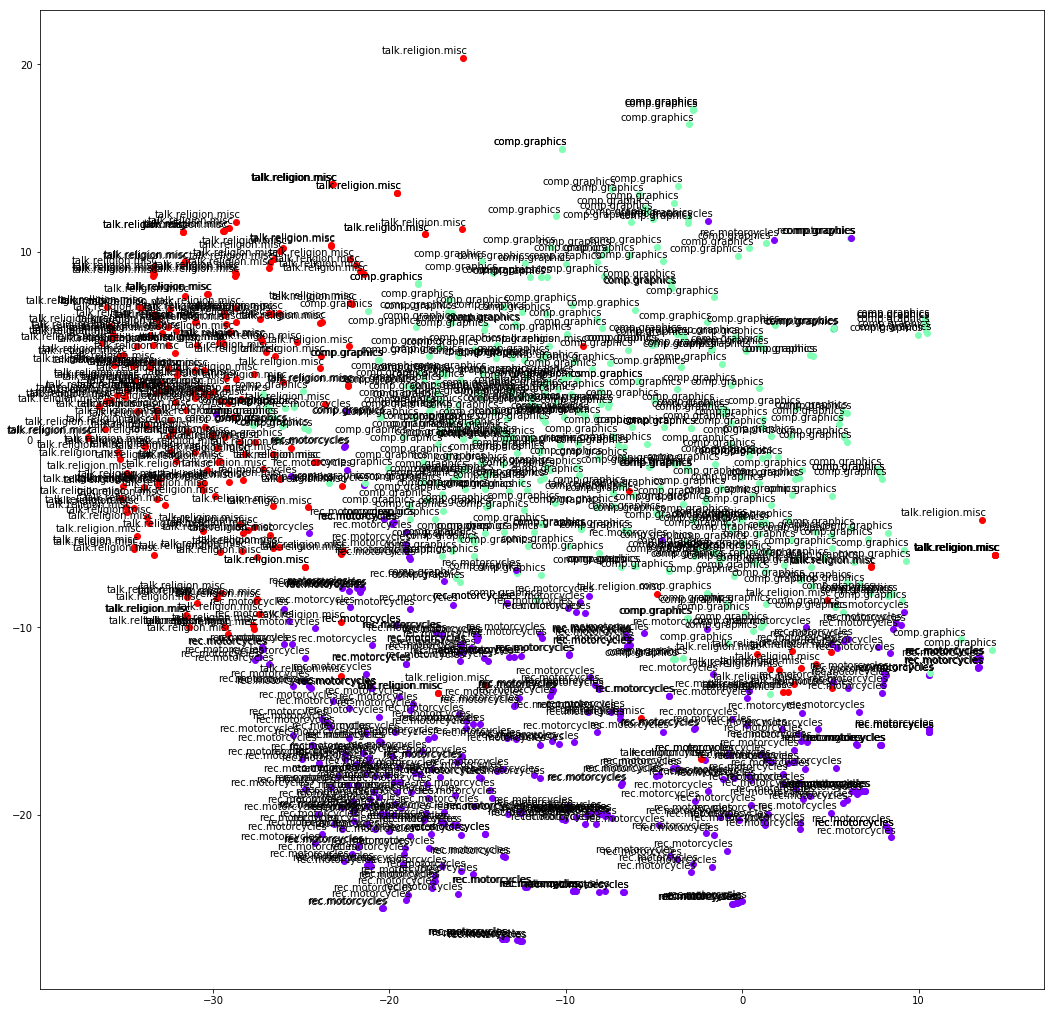

In [392]:
plot_model(finals=normalize(X_tsne), reverses=list(y_tsne_true), isWord=False, fname='tsne-prediction-01.png')

In [393]:
# Store data in X_tsne, y_tsne
X_tsne, y_tsne_true = getDocData_tsne(4)
y_tsne_true.unique()

array(['talk.politics.guns', 'comp.os.ms-windows.misc', 'sci.space',
       'sci.med'], dtype=object)

In [394]:
pathCSV_root = os.path.join(paths['dir.dataroot'], 'records_CSV')
X_tsne.to_csv(os.path.join(pathCSV_root, '_final-tsne-02-X.csv'))
y_tsne_true.to_csv(os.path.join(pathCSV_root, '_final-tsne-02-y.csv'))

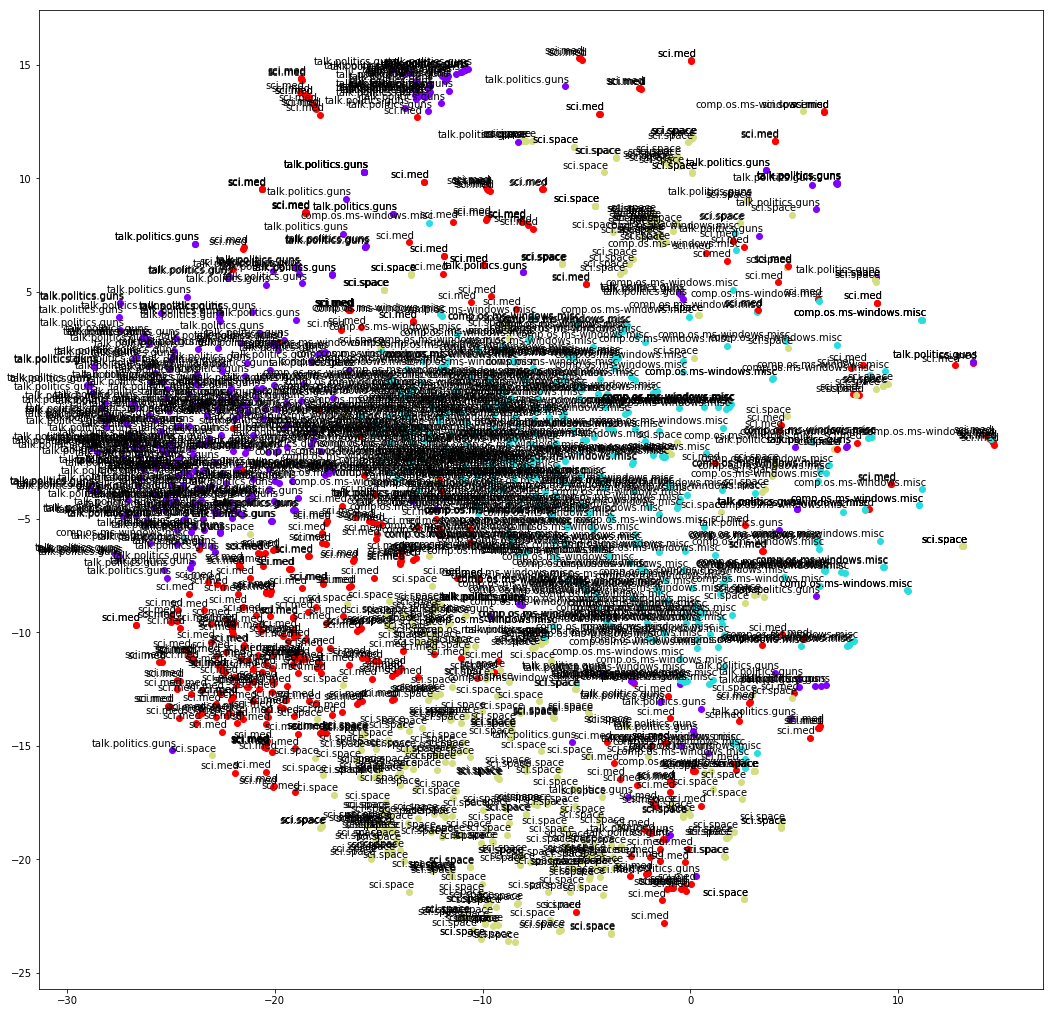

In [395]:
plot_model(finals=normalize(X_tsne), reverses=list(y_tsne_true), isWord=False, fname='tsne-prediction-02.png')

In [ ]:
# Store data in X_tsne, y_tsne
X_tsne, y_tsne_true = getDocData_tsne(5)
y_tsne_true.unique()

In [403]:
pathCSV_root = os.path.join(paths['dir.dataroot'], 'records_CSV')
X_tsne.to_csv(os.path.join(pathCSV_root, '_final-tsne-03-X.csv'))
y_tsne_true.to_csv(os.path.join(pathCSV_root, '_final-tsne-03-y.csv'))

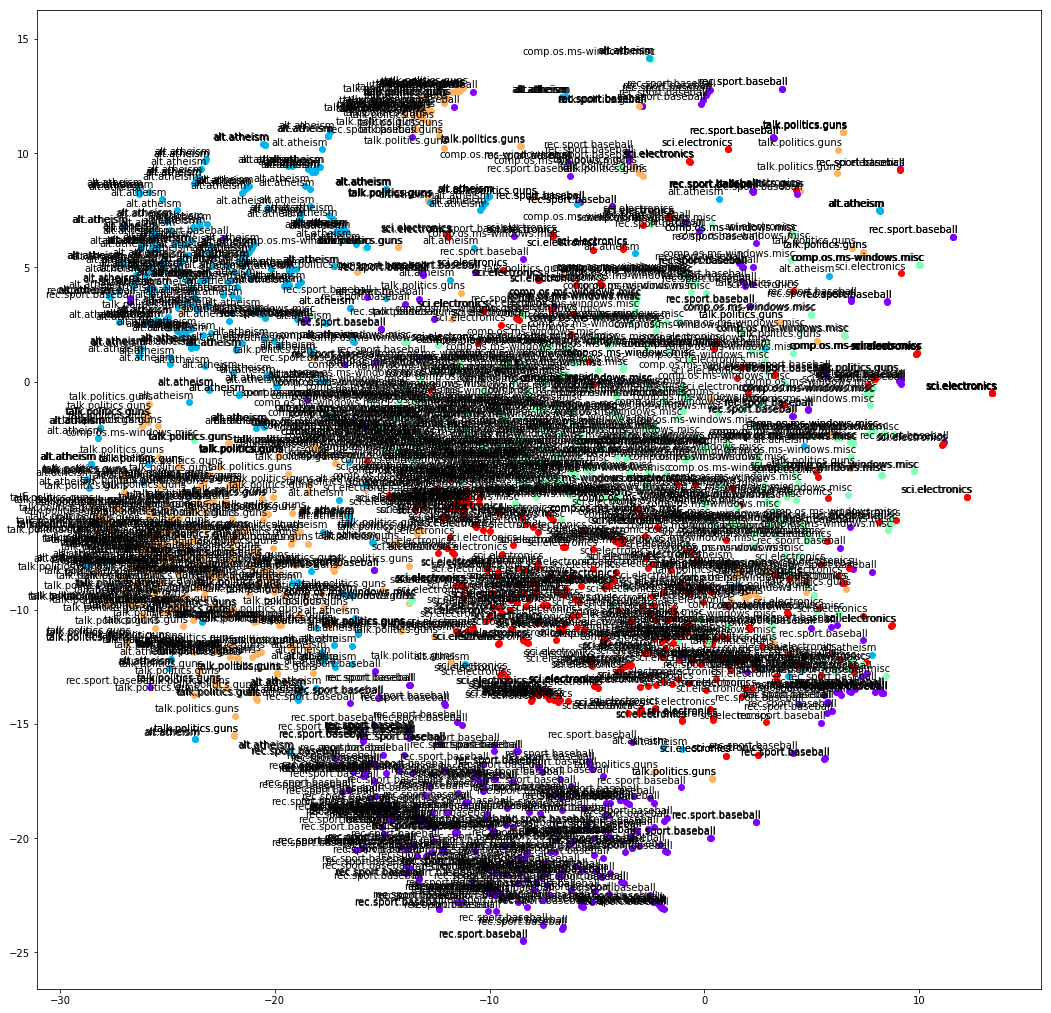

In [404]:
plot_model(finals=normalize(X_tsne), reverses=list(y_tsne_true), isWord=False, fname='tsne-prediction-03.png')